## WCPS query generator documentation


### 1. General setting

Our tasks is to make an effective and convinient WCPS qeuery generator using functionality in Python. It is basically a Python library for this purpose. We can already imagine that we will need to pass certain parameters into relevant methods of some datacube object which should then send the composed qeueries to the provided server ("https://ows.rasdaman.org/rasdaman/ows") where they will be processed and returned.

We will need the following imports:

In [1]:
from DBC import DBC
from DCO import DCO, AxisSubset
from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import netCDF4 as nc
from IPython.display import display
from PIL import Image

import requests
from owslib.wcs import WebCoverageService
from owslib.wcs import wcs201

import io

import urllib3

urllib3.disable_warnings()

---

### 2. Data cube object (dco) and data base connection (dbc) class fucntionality


#### 2.1 DBC()

 **DBC(*endpoint*)**

 Creates an instance of DBC object.

 *Parameters:*

 **endpoint : *string***

 Name of a server.

 *Example:*

In [2]:
dbc = DBC("https://ows.rasdaman.org/rasdaman/ows")

#### 2.2 DBC.get_covereges

 **DBC.get_covereges()**

 To get all available covereges from the server.

 *Parameters:*

 \-

 *Returns:*

 String of enumerated coverege names each from new line.

 *Example:*

In [3]:
print(dbc.get_coverages())

1 - AverageChloroColor
2 - AverageChloroColorScaled
3 - AverageChloroColor_16
4 - AverageChloroColor_2
5 - AverageChloroColor_32
6 - AverageChloroColor_4
7 - AverageChloroColor_64
8 - AverageChloroColor_8
9 - AvgLandTemp
10 - AvgTemperatureColor
11 - AvgTemperatureColorScaled
12 - AvgTemperatureColor_16
13 - AvgTemperatureColor_32
14 - AvgTemperatureColor_4
15 - AvgTemperatureColor_64
16 - AvgTemperatureColor_8
17 - Bavaria_50_DSM
18 - BlueMarbleCov
19 - BlueMarbleCov_16
20 - BlueMarbleCov_32
21 - BlueMarbleCov_4
22 - BlueMarbleCov_64
23 - BlueMarbleCov_8
24 - Germany_DTM
25 - Germany_DTM_16
26 - Germany_DTM_32
27 - Germany_DTM_4
28 - Germany_DTM_64
29 - Germany_DTM_8
30 - NIR
31 - NN3_1
32 - NN3_2
33 - NN3_3
34 - NN3_4
35 - RadianceColorScaled
36 - S2_L2A_32631_B01_60m
37 - S2_L2A_32631_B03_10m
38 - S2_L2A_32631_B04_10m
39 - S2_L2A_32631_B08_10m
40 - S2_L2A_32631_B12_20m
41 - S2_L2A_32631_TCI_60m
42 - S2_federation_demo
43 - Temperature4D
44 - climate_cloud
45 - climate_earth
46 - lan

#### 2.3 DBC.execute_query

 **DBC.execute_query(*query*)**

 Posts a request query onto a server.

 *Parameters:*

 **query : *string***

 *Returns:*

 List of bytes which is a response from the server from whatever user has specified or an error for non-scalar values (use encode() for those) if the query is structured improperly.

#### 2.4 DCO()

 **DCO.(*dbc*)**

 Creates an instance of DCO object

 *Parameters:*

 **dbc : *DBC***

 The corresponding data base connection object

 *Example:*

In [4]:
dco = DCO(dbc)

#### 2.5 AxisSubset()

 **AxisSubset(*operation*, *values*)**

 Creates an instance of AxisSubset class which contains a query generated from formated input values according to WCPS syntax. Only used as an input argument for **subset()** method.

 *Parameters:*

 **operation : *string***

 **values : *string, int, float, etc***

 *Example:*

 see in **subset()** documentation.

#### 2.6 DCO.select

 **DCO.select(*variable_name*, *datacube_names*)**

 Returns subset of a covering

 *Parameters:*

 **variable_name : *string***

 Name of a variable

 **datacube_names : *list[str]***

 List of names of datacubes we want to consider

 *Returns:*

 **self**

 *Example:*

In [5]:
dco.select("$c", ["AvgLandTemp"])

#### 2.7 DCO.subset

 **DCO.subset(*variable_name*, *subset*)**

 Returns subset of a covering

 *Parameters:*

 **variable_name : *string***

 Name of a coverage

 **subset : *string***

 Range of coordinates in a datacube that we want to consider

 *Returns:*

 **self**

 *Example:*

In [6]:
dco.subset(variable="$c", 
                      axis_subsets=[AxisSubset('ansi', '2013-08'),
                                    AxisSubset('Lat', 25, 90),
                                    AxisSubset('Long', -30, 55)])

#### 2.8 DCO.transform_data

 **DCO.transform_data(*transformation*)**

 Returns a transformed (with desired mathematical operations) coverage. In qeuery it replaces the previously selcted variable with the passed expression, therefore modifying the sected set.

 *Parameters:*

 **transformation : *string***

 Mathematical expression with operations we wish to perform on the coverage

 *Returns:*

 **self**

 *Example:*

In [7]:
dco.transform_data('$c + 10.2')

#### 2.9 DCO.set_format

 **DCO.set_format(*format*)**

 Lets you specify the format of the coverage. It will then be substituted when we call **execute()**. If this method is specified the encode() is ignored.

 *Parameters:*

 **format : *string***

 Name of a format (png, csv, etc)

 *Returns:*

 **self**

 *Example:*

In [8]:
dco.set_format('image/png')

#### 2.10 DCO.custome_encode

 **DCO.custome_ecode(var)**

 Provide custome logic for further qeuery execution.

 *Parameters:*

 **var : *string***

 *Returns:*

 **self**

 *Example:*

In [9]:
dco.custom_encode('''
                    switch
                        case $c = 99999
                            return {red: 255; green: 255; blue: 255}
                        case 18 > $c
                            return {red: 0; green: 0; blue: 255}
                        case 23 > $c
                            return {red: 255; green: 255; blue: 0}
                        case 30 > $c
                            return {red: 255; green: 140; blue: 0}
                        default return {red: 255; green: 0; blue: 0}
                       ''')

#### 2.11 DCO.execute

 **DCO.execute()**

 Calls **execute_query()** method in DBC object we previously passed to our DCO.

 *Parameters:*

 \-

 *Returns:*

 **self**

 *Example:*

In [10]:
res = dco.execute()

for $c in (AvgLandTemp)
return encode(
                    switch
                        case $c[ansi("2013-08"), Lat(25:90), Long(-30:55)] + 10.2 = 99999
                            return {red: 255; green: 255; blue: 255}
                        case 18 > $c[ansi("2013-08"), Lat(25:90), Long(-30:55)] + 10.2
                            return {red: 0; green: 0; blue: 255}
                        case 23 > $c[ansi("2013-08"), Lat(25:90), Long(-30:55)] + 10.2
                            return {red: 255; green: 255; blue: 0}
                        case 30 > $c[ansi("2013-08"), Lat(25:90), Long(-30:55)] + 10.2
                            return {red: 255; green: 140; blue: 0}
                        default return {red: 255; green: 0; blue: 0}
                       , "image/png")


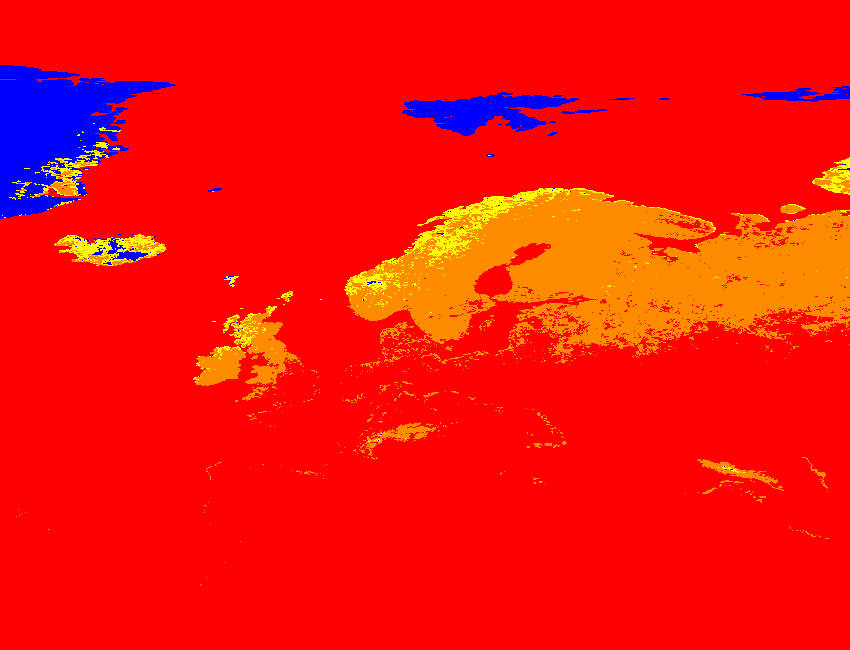

In [11]:
img = Image.open(io.BytesIO(res))
display(img)

### 3. Aggregation methods

Setup for examples:

#### 3.1 DCO.min

 **DCO.min()**

 Returns minimum out of all points in coverage.

 *Parameters:*

 \-

 *Returns:*

 **float**

 *Example:*

In [12]:
dco2 = DCO(dbc)
dco2.select("$c", ["AvgLandTemp"])
dco2.subset(variable="$c", 
                      axis_subsets=[AxisSubset('ansi', '2013-07', '2015-04'),
                                    AxisSubset('Lat', 54.08),
                                    AxisSubset('Long', 8.80)])

min_res = dco2.min().execute()
print(min_res)

for $c in (AvgLandTemp)
return min($c[ansi("2013-07":"2015-04"), Lat(54.08), Long(8.8)])
b'1.4566929'


#### 3.2 max()

 **DCO.max()**

 Returns maximum out of all points in coverage.

 *Parameters:*

 \-

 *Returns:*

 **float**

In [13]:
dco2 = DCO(dbc)
dco2.select("$c", ["AvgLandTemp"])
dco2.subset(variable="$c", 
                      axis_subsets=[AxisSubset('ansi', '2013-07', '2015-04'),
                                    AxisSubset('Lat', 54.08),
                                    AxisSubset('Long', 8.80)])

max_res = dco2.max().execute()
print(max_res)

for $c in (AvgLandTemp)
return max($c[ansi("2013-07":"2015-04"), Lat(54.08), Long(8.8)])
b'23.779528'


#### 3.3 sum()

 **DCO.sum()**

 Returns the sum of all points in coverage.

 *Parameters:*

 \-

 *Returns:*

 **float**

In [14]:
dco2 = DCO(dbc)
dco2.select("$c", ["AvgLandTemp"])
dco2.subset(variable="$c", 
                      axis_subsets=[AxisSubset('ansi', '2013-07', '2015-04'),
                                    AxisSubset('Lat', 54.08),
                                    AxisSubset('Long', 8.80)])

sum_res = dco2.sum().execute()
print(sum_res)

for $c in (AvgLandTemp)
return sum($c[ansi("2013-07":"2015-04"), Lat(54.08), Long(8.8)])
b'253.34645688533783'


#### 3.4 avg()

 **DCO.avg()**

 Returns the average of all points in coverage.

 *Parameters:*

 \-

 *Returns:*

 **float**

In [15]:
dco2 = DCO(dbc)
dco2.select("$c", ["AvgLandTemp"])
dco2.subset(variable="$c", 
                      axis_subsets=[AxisSubset('ansi', '2013-07', '2015-04'),
                                    AxisSubset('Lat', 54.08),
                                    AxisSubset('Long', 8.80)])

avg_res = dco2.avg().execute()
print(avg_res)

for $c in (AvgLandTemp)
return avg($c[ansi("2013-07":"2015-04"), Lat(54.08), Long(8.8)])
b'11.515748040242629'


#### 3.5 count()

 **DCO.count()**

 Returns the number of all points in coverage.

 *Parameters:*

 \-

 *Returns:*

 **int**

In [16]:
dco2 = DCO(dbc)
dco2.select("$c", ["AvgLandTemp"])
dco2.subset(variable="$c", 
                    axis_subsets=[AxisSubset('ansi', '2013-07', '2015-04'),
                                AxisSubset('Lat', 54.08, 56),
                                AxisSubset('Long', 8.80, 10)])

count_res = dco2.count().execute()
print(count_res)

for $c in (AvgLandTemp)
return cellCount($c[ansi("2013-07":"2015-04"), Lat(54.08:56), Long(8.8:10)])
b'53'


## Sprint 2

### Overview
This documentation highlights the major changes implemented across three key components: the DCO class and  unit tests. As well as usage instructions.

### 1. DCO Class
#### Major Changes:

Refactored Initialization:
- Simplified the constructor to include clear documentation and variable initialization.
- Grouped operations like selection, subset, and where clauses into well-documented methods.

New Utility Functions:
- Gradient Image Construction: construct_gradient_image enables the creation of gradient images based on specified variables.
- Temperature Conversion: celsius_to_kelvin converts temperature data from Celsius to Kelvin.
- Polygon Clipping: clip_with_polygon extracts data within a polygonal geographic region.
- Threshold Querying: greater_than_query counts data cells exceeding a given value.

Usage Example:

In [17]:
dco5 = DCO(dbc)
dco5.select("$c", ["AverageChloroColor"])

In [18]:
dco5.construct_gradient_image(variable="$c")
dco5.set_format('image/png')
output5 = dco5.execute()

for $c in (AverageChloroColor)
return encode(
            coverage myCoverage over
                $p x(0:200),
                $q y(0:200)
            values $p + $q
        , "image/png")


In [19]:
img2 = Image.open(io.BytesIO(output5))
img2.show()

## 2.Unit Tests
#### Major Changes:
Covered all new utility functions like construct_gradient_image and celsius_to_kelvin.

###### How to Run Tests:

Ensure unittest is available in your environment.
Execute the following command in the project directory:


`python -m unittest discover -v`

Sample Output:

> Success messages indicating all tests passed.

>Detailed error messages if any tests fail.

### Example on how to use new functions:

#### 3.6 describe_coverage()

 **dbc.describe_coverage(coverage_id)**

 Returns the name of axis labels, the dimensions, the low limits and the high limits of the selected coverage.

 *Parameters:*

 coverage_id

 *Returns:*

 **dictionary**

In [20]:
coverage_id = "S2_L2A_32631_B08_10m"
description = dbc.describe_coverage(coverage_id)
print(description)

{'axis_labels': ['ansi', 'E', 'N'], 'dimension': 3, 'low_limits': ['0', '0', '0'], 'high_limits': ['0', '5999', '2499']}


### 4. Arithmetic operations for handling more than two variables from different coverages with the same subset

#### 4.1 DCO.selectMultVar

 **DCO.selectMultVar(*variable_names*, *datacube_names*)**

 Select multiple variables and corresponding datacubes in preparation for executing a query or operation on those variables

 *Parameters:*

 **variables_names : *list[str]***

 List with name of variables

 **datacube_names : *list[str]***

 List of names of datacubes we want to consider

 *Returns:*

 **self**

 *Example:*

In [21]:
dco3 = DCO(dbc)

# Select multiple variables and coverages
variables = ['$c', '$d']  # List of variables

coverage_id1 = "ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_maximum_near_surface_air_temperature"
coverage_id2 = "ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_minimum_near_surface_air_temperature"

datacubes = [coverage_id1, coverage_id2]  # List of cooverage id

dco3.selectMultVar(variables, datacubes)

#### 4.2 DCO.subsetMultVar

 **DCO.only_subset (*axis_subsets*)**

 Function that returns only the subset used for two variable functions

 *Parameters:*

**axis_subsets : *list[str]***

 List of subset specifications in the form List[AxisSubset]

 *Returns:*

 **self**

 *Example:*

In [22]:
# Set subset for each variable
dco3.only_subset(axis_subsets=[AxisSubset('time', '2015-01-01T12:00:00.000Z'),
                                AxisSubset('Lat', 40),
                                AxisSubset('Long', 40)])

#### 4.3 DCO.executeMultVar

 **DCO.executeMultVar()**

 Calls **execute_query()** method in DBC object we previously passed to our DCO for multiple variables.

 *Parameters:*

 \-

 *Returns:*

 **self.__dbc.execute_query(query)**

#### 4.4 DCO.calculate_difference

 **DCO.calculate_difference ()**

 Function that calculates the difference between two numerical variables in different coverages with same subset

 *Parameters:*

none

 *Returns:*

 **self**

 *Example:*

In [23]:
dco3.calculate_difference().executeMultVar()

for $c in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_maximum_near_surface_air_temperature), $d in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_minimum_near_surface_air_temperature)
return
$c[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)] - $d[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)]


b'4.8843994'

#### 4.5 DCO.calculate_Sum

 **DCO.calculate_Sum ()**

 Function that calculates the sum between two numerical variables in different coverages with same subset

 *Parameters:*

none

 *Returns:*

 **self**

 *Example:*

In [24]:
dco3.calculate_Sum().executeMultVar()

for $c in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_maximum_near_surface_air_temperature), $d in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_minimum_near_surface_air_temperature)
return
$c[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)] + $d[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)]


b'521.32227'

#### 4.6 DCO.calculate_Avg

 **DCO.calculate_Avg ()**

 Function that calculates the average between two numerical variables in different coverages with same subset

 *Parameters:*

none

 *Returns:*

 **self**

 *Example:*

In [25]:
dco3.calculate_Avg().executeMultVar()

for $c in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_maximum_near_surface_air_temperature), $d in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_minimum_near_surface_air_temperature)
return
($c[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)] + $d[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)])/2


b'260.6611328125'

#### 4.7 DCO.calculate_Product

 **DCO.calculate_Product ()**

 Function that calculates the product between two numerical variables in different coverages with same subset

 *Parameters:*

none

 *Returns:*

 **self**

 *Example:*

In [26]:
dco3.calculate_Product().executeMultVar()

for $c in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_maximum_near_surface_air_temperature), $d in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_minimum_near_surface_air_temperature)
return
$c[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)] * $d[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)]


b'67938.266'

#### 4.8 DCO.calculate_Ratio

 **DCO.calculate_Ratio ()**

 Function that calculates the ratio between two numerical variables in different coverages with same subset

 *Parameters:*

none

 *Returns:*

 **self**

 *Example:*

In [27]:
dco3.calculate_Ratio().executeMultVar()

for $c in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_maximum_near_surface_air_temperature), $d in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_minimum_near_surface_air_temperature)
return
$c[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)] / $d[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)]


b'1.0189158'

#### 4.9 DCO.executeMultVar

 **DCO.executeMultVar ()**

 Function that returns the variables from different coverages with the same subset used for future functions

 *Parameters:*

none

 *Returns:*

 **self**

 *Example:*

In [28]:
dco4 = DCO(dbc)

# Select multiple variables and coverages
variables = ['$c', '$d']  # List of variables

coverage_id1 = "ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_maximum_near_surface_air_temperature"
coverage_id2 = "ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_minimum_near_surface_air_temperature"

datacubes = [coverage_id1, coverage_id2]  # List of coverage id

dco4.selectMultVar(variables, datacubes)
dco4.subset_to_variables(variables, axis_subsets=[AxisSubset('time', '2015-01-01T12:00:00.000Z'),
                                AxisSubset('Lat', 40),
                                AxisSubset('Long', 40)])

In [29]:
dco4.executeMultVar()

for $c in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_maximum_near_surface_air_temperature), $d in (ogc-testbed19-geodatacube.earthserver.xyz--7000--CMIP6_Daily_minimum_near_surface_air_temperature)
return
$c[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)], $d[time("2015-01-01T12:00:00.000Z"), Lat(40), Long(40)]


b'263.10333'

#### Conclusion
These improvements have expanded the capabilities of the DCO class, introduced flexible data querying features, and ensured robust error handling via comprehensive unit tests. The new utility functions and improved data visualization techniques were built upon the previous sprint's work. Furthermore, more functions for handling multiple coverages data were added.

#### Authors
- Evelyn Quintero
- Solomon Njora